In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [32]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("Shark Tank India.xlsx")

print("Head of dataset:")
print(df.head())
print("\nDataset info:")
df.info()

print("\nDescriptive statistics:")
print(df.describe(include='all'))

Saving Shark Tank India.xlsx to Shark Tank India (2).xlsx
Head of dataset:
   Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1   2021-12-20   
1              1      BoozScooters               1             2   2021-12-20   
2              1  HeartUpMySleeves               1             3   2021-12-20   
3              1         TagzFoods               2             4   2021-12-20   
4              1      HeadAndHeart               2             5   2021-12-20   

  Season End Original Air Date                Episode Title           Anchor  \
0 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
1 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
2 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
3 2022-02-04        2021-12-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4 2022-02-04        2021-12-21      In

In [33]:
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

essential_cols = ['Startup Name', 'Original Ask Amount', 'Industry', 'Original Air Date']
df = df.dropna(subset=essential_cols)
print(f"\nDataset shape after dropping rows with missing essential values: {df.shape}")

date_cols = ['Season Start', 'Season End', 'Original Air Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

numeric_cols = ['Original Ask Amount', 'Total Deal Amount', 'Valuation Requested',
                'Deal Valuation', 'Gross Margin', 'Net Margin', 'Yearly Revenue', 'Monthly Sales']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()


Dataset shape after removing duplicates: (633, 80)

Missing values per column:
Season Number       0
Startup Name        0
Episode Number      0
Pitch Number        0
Season Start        0
                 ... 
Aman Present       77
Peyush Present    246
Ritesh Present    495
Amit Present      496
Guest Present     323
Length: 80, dtype: int64

Dataset shape after dropping rows with missing essential values: (602, 80)
<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 0 to 632
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Season Number              602 non-null    int64         
 1   Startup Name               602 non-null    object        
 2   Episode Number             602 non-null    int64         
 3   Pitch Number               602 non-null    int64         
 4   Season Start               602 non-null    datetime64[ns]
 5   Season End                 447 n


Average Original Ask Amount by Industry:
Industry
Food and Beverage               287.788322
Entertainment                   216.666667
Electronics                     143.333333
Business Services                98.194444
Liquor/Alcohol                   95.833333
Lifestyle/Home                   90.060976
Vehicles/Electrical Vehicles     89.736842
Manufacturing                    89.170213
Beauty/Fashion                   84.931968
Hardware                         83.500000
Technology/Software              82.403509
Medical/Health                   82.339642
Green/CleanTech                  77.667500
Others                           74.260000
Fitness/Sports/Outdoors          72.631579
Children/Education               71.200000
Agriculture                      68.571429
Animal/Pets                      54.000000
Name: Original Ask Amount, dtype: float64

Number of deals per Season:
Season Number
1    122
2    168
3    157
4    155
Name: count, dtype: int64

Correlation Matrix:
       

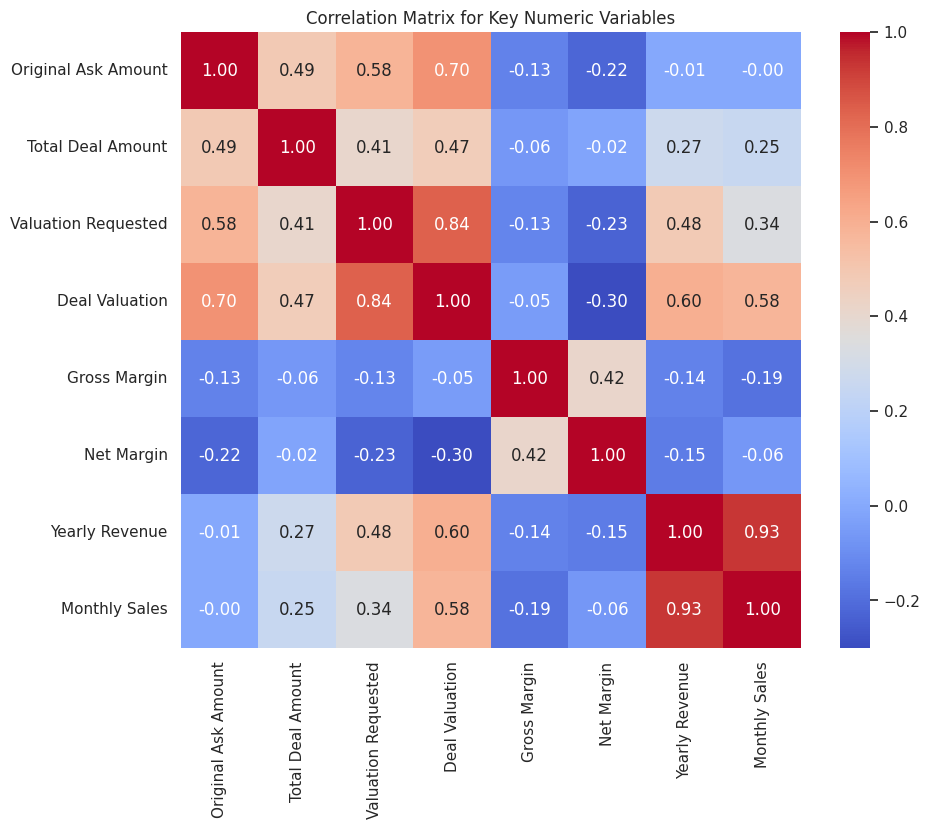

In [34]:
industry_ask_mean = df.groupby("Industry")["Original Ask Amount"].mean().sort_values(ascending=False)
print("\nAverage Original Ask Amount by Industry:")
print(industry_ask_mean)

season_deal_counts = df["Season Number"].value_counts().sort_index()
print("\nNumber of deals per Season:")
print(season_deal_counts)

corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Key Numeric Variables")
plt.show()


In [35]:
columns_to_fill = ['Male Presenters', 'Female Presenters', 'Transgender Presenters',
                   'Received Offer', 'Total Deal Equity', 'Total Deal Amount']

df[columns_to_fill] = df[columns_to_fill].fillna(0)

print(df[columns_to_fill].isnull().sum())

Male Presenters           0
Female Presenters         0
Transgender Presenters    0
Received Offer            0
Total Deal Equity         0
Total Deal Amount         0
dtype: int64


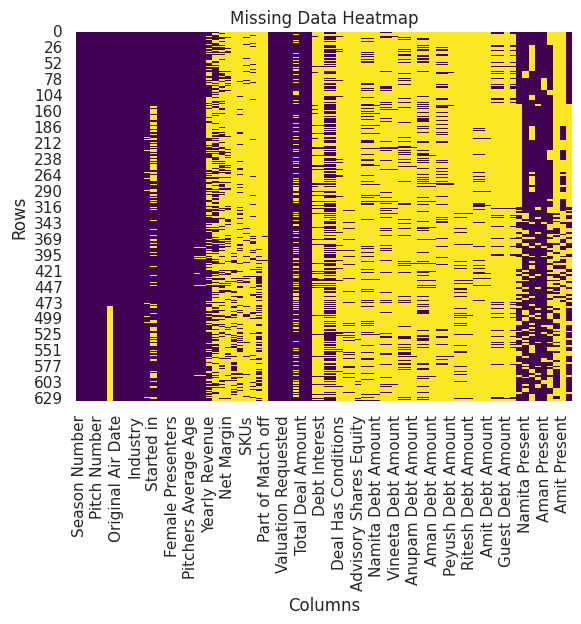

In [36]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [37]:
present_columns = ['Namita Present', 'Vineeta Present', 'Anupam Present', 'Aman Present',
                   'Peyush Present', 'Ritesh Present', 'Amit Present', 'Guest Present']

df[present_columns] = df[present_columns].fillna(0)
print(df[present_columns].isnull().sum())
print(df[present_columns].head())


Namita Present     0
Vineeta Present    0
Anupam Present     0
Aman Present       0
Peyush Present     0
Ritesh Present     0
Amit Present       0
Guest Present      0
dtype: int64
   Namita Present  Vineeta Present  Anupam Present  Aman Present  \
0             1.0              1.0             1.0           1.0   
1             1.0              1.0             1.0           1.0   
2             1.0              1.0             1.0           1.0   
3             1.0              1.0             1.0           1.0   
4             1.0              1.0             1.0           1.0   

   Peyush Present  Ritesh Present  Amit Present  Guest Present  
0             0.0             0.0           0.0            1.0  
1             0.0             0.0           0.0            1.0  
2             0.0             0.0           0.0            1.0  
3             0.0             0.0           0.0            1.0  
4             0.0             0.0           0.0            1.0  


In [38]:
df['Deal Success'] = df.apply(lambda row: 1 if row['Received Offer'] == 1 and row['Accepted Offer'] == 1 else 0, axis=1)

df['Revenue-to-Investment Ratio'] = df.apply(lambda row: row['Yearly Revenue'] / row['Total Deal Amount'] if row['Total Deal Amount'] > 0 else 0, axis=1)

df['Founder Diversity Score'] = df[['Male Presenters', 'Female Presenters', 'Transgender Presenters']].sum(axis=1)

industry_avg_revenue = df.groupby("Industry")["Yearly Revenue"].transform('median')
df['Industry Influence'] = df['Yearly Revenue'] / industry_avg_revenue

WEIGHTS = {
    "Deal Secured": 40,
    "Revenue Growth": 30,
    "Founder Diversity": 20,
    "Industry Influence": 10
}


df['Founder Success Score'] = (
    df['Deal Success'] * WEIGHTS["Deal Secured"] +
    df['Revenue-to-Investment Ratio'] * WEIGHTS["Revenue Growth"] +
    df['Founder Diversity Score'] * WEIGHTS["Founder Diversity"] +
    df['Industry Influence'] * WEIGHTS["Industry Influence"]
)


In [39]:
df_sorted = df.sort_values(by='Founder Success Score', ascending=False)
print(df_sorted[['Startup Name', 'Founder Success Score']].head(10))

       Startup Name  Founder Success Score
45          Cocofit           6.000011e+07
592            F2DF           5.697784e+03
510  SavaniHeritage           4.306275e+03
590      Trajectory           3.552000e+03
622    TheBearHouse           3.234758e+03
385           Refit           2.903985e+03
603          Fitelo           2.237037e+03
502  NurturingGreen           1.831803e+03
306          Rubans           1.747281e+03
423       LittleBox           1.616904e+03


In [40]:
print(df['Founder Success Score'].describe())

count    3.360000e+02
mean     1.788385e+05
std      3.273260e+06
min      2.000000e+01
25%      5.202812e+01
50%      1.213333e+02
75%      2.540261e+02
max      6.000011e+07
Name: Founder Success Score, dtype: float64


In [41]:
columns_to_remove = ['EBITDA', 'Cash Burn', 'SKUs', 'Bootstrapped']

df = df.drop(columns=columns_to_remove)

print(df.head())


   Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1   2021-12-20   
1              1      BoozScooters               1             2   2021-12-20   
2              1  HeartUpMySleeves               1             3   2021-12-20   
3              1         TagzFoods               2             4   2021-12-20   
4              1      HeadAndHeart               2             5   2021-12-20   

  Season End Original Air Date                Episode Title           Anchor  \
0 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
1 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
2 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
3 2022-02-04        2021-12-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4 2022-02-04        2021-12-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   

                       Industry 

In [42]:
null_fill = ['Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
            'Accepted Offer', 'Number of Sharks in Deal', 'Royalty Percentage', 'Royalty Recouped Amount', 'Advisory Shares Equity' ]

df[null_fill] = df[null_fill].fillna(0)

print(df[null_fill].isnull().sum())

Total Deal Equity           0
Total Deal Debt             0
Debt Interest               0
Accepted Offer              0
Number of Sharks in Deal    0
Royalty Percentage          0
Royalty Recouped Amount     0
Advisory Shares Equity      0
dtype: int64


In [43]:
df['Deal Has Conditions'] = df['Deal Has Conditions'].fillna('No')

print(df['Deal Has Conditions'].value_counts())

Deal Has Conditions
No     565
yes     37
Name: count, dtype: int64


In [44]:
column_names = df.columns.tolist()
print("Column Names:")
print(df.columns)


Column Names:
Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Episode Title',
       'Anchor', 'Industry', 'Business Description', 'Company Website',
       'Started in', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'Has Patents', 'Part of Match off', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of Sharks in Deal', 'Deal Has Conditions', 'Royalty Percentage',
       'Royalty Recouped Amount', 'Advisory Shares Equity',
       'Namita Investment Amount', 'Namita Investment Equity',
       'Namita D

In [45]:
investment_fill = ['Namita Investment Amount', 'Namita Investment Equity',
       'Namita Debt Amount', 'Vineeta Investment Amount',
       'Vineeta Investment Equity', 'Vineeta Debt Amount',
       'Anupam Investment Amount', 'Anupam Investment Equity',
       'Anupam Debt Amount', 'Aman Investment Amount',
       'Aman Investment Equity', 'Aman Debt Amount',
       'Peyush Investment Amount', 'Peyush Investment Equity',
       'Peyush Debt Amount', 'Ritesh Investment Amount',
       'Ritesh Investment Equity', 'Ritesh Debt Amount',
       'Amit Investment Amount', 'Amit Investment Equity', 'Amit Debt Amount',
       'Guest Investment Amount', 'Guest Investment Equity',
       'Guest Debt Amount']

df[investment_fill] = df[investment_fill].fillna(0)

print(df[investment_fill].isnull().sum())

Namita Investment Amount     0
Namita Investment Equity     0
Namita Debt Amount           0
Vineeta Investment Amount    0
Vineeta Investment Equity    0
Vineeta Debt Amount          0
Anupam Investment Amount     0
Anupam Investment Equity     0
Anupam Debt Amount           0
Aman Investment Amount       0
Aman Investment Equity       0
Aman Debt Amount             0
Peyush Investment Amount     0
Peyush Investment Equity     0
Peyush Debt Amount           0
Ritesh Investment Amount     0
Ritesh Investment Equity     0
Ritesh Debt Amount           0
Amit Investment Amount       0
Amit Investment Equity       0
Amit Debt Amount             0
Guest Investment Amount      0
Guest Investment Equity      0
Guest Debt Amount            0
dtype: int64


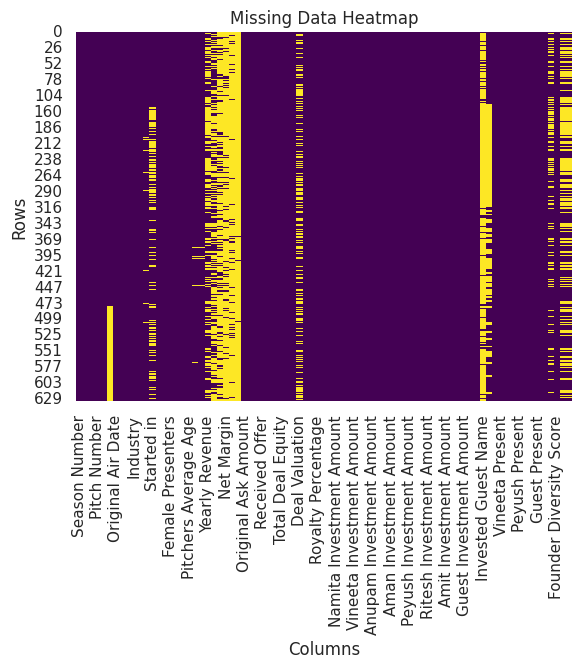

In [46]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [47]:
df['Season Start'] = df['Season Start'].fillna(df['Original Air Date'])
df['Season End'] = df['Season End'].fillna(df['Season End'])
print(df)

     Season Number      Startup Name  Episode Number  Pitch Number  \
0                1     BluePineFoods               1             1   
1                1      BoozScooters               1             2   
2                1  HeartUpMySleeves               1             3   
3                1         TagzFoods               2             4   
4                1      HeadAndHeart               2             5   
..             ...               ...             ...           ...   
628              4             Ecoil              51           630   
629              4          Rescript              51           631   
630              4     TickleYourArt              52           632   
631              4         Symbionic              52           633   
632              4          XLCinema              52           634   

    Season Start Season End Original Air Date                Episode Title  \
0     2021-12-20 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer   
1  

In [48]:
print(df[['Yearly Revenue', 'Net Margin']].isnull().sum())

Yearly Revenue    266
Net Margin        509
dtype: int64


In [49]:
df = df.drop(columns=['Yearly Revenue', 'Net Margin'])
print(df)

     Season Number      Startup Name  Episode Number  Pitch Number  \
0                1     BluePineFoods               1             1   
1                1      BoozScooters               1             2   
2                1  HeartUpMySleeves               1             3   
3                1         TagzFoods               2             4   
4                1      HeadAndHeart               2             5   
..             ...               ...             ...           ...   
628              4             Ecoil              51           630   
629              4          Rescript              51           631   
630              4     TickleYourArt              52           632   
631              4         Symbionic              52           633   
632              4          XLCinema              52           634   

    Season Start Season End Original Air Date                Episode Title  \
0     2021-12-20 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer   
1  

In [50]:
df['DealSuccess'] = np.where((df['Received Offer'] == 1) & (df['Accepted Offer'] == 1), 'Success', 'No Deal')
display(df)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Peyush Present,Ritesh Present,Amit Present,Guest Present,Deal Success,Revenue-to-Investment Ratio,Founder Diversity Score,Industry Influence,Founder Success Score,DealSuccess
0,1,BluePineFoods,1,1,2021-12-20,2022-02-04,2021-12-20,Badlegi Business Ki Tasveer,Rannvijay Singh,Food and Beverage,...,0.0,0.0,0.0,1.0,1,1.266667,3.0,0.527778,143.277778,Success
1,1,BoozScooters,1,2,2021-12-20,2022-02-04,2021-12-20,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,...,0.0,0.0,0.0,1.0,1,0.100000,1.0,2.000000,83.000000,Success
2,1,HeartUpMySleeves,1,3,2021-12-20,2022-02-04,2021-12-20,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,...,0.0,0.0,0.0,1.0,1,NaN,1.0,NaN,NaN,Success
3,1,TagzFoods,2,4,2021-12-20,2022-02-04,2021-12-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food and Beverage,...,0.0,0.0,0.0,1.0,1,10.000000,2.0,3.888889,418.888889,Success
4,1,HeadAndHeart,2,5,2021-12-20,2022-02-04,2021-12-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Children/Education,...,0.0,0.0,0.0,1.0,0,0.000000,4.0,0.134529,81.345291,No Deal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,4,Ecoil,51,630,2025-01-06,NaT,2025-03-17,Ecopreneurs In The Tank,Sahiba Bali/Aashish Solanki,Green/CleanTech,...,0.0,1.0,0.0,1.0,1,34.000000,2.0,5.312500,1153.125000,Success
629,4,Rescript,51,631,2025-01-06,NaT,2025-03-17,Ecopreneurs In The Tank,Sahiba Bali/Aashish Solanki,Green/CleanTech,...,0.0,1.0,0.0,1.0,0,0.000000,2.0,0.843750,48.437500,No Deal
630,4,TickleYourArt,52,632,2025-01-06,NaT,2025-03-18,Empowering Abilities,Aashish Solanki,Others,...,0.0,0.0,0.0,2.0,1,0.938967,3.0,0.121212,129.381135,Success
631,4,Symbionic,52,633,2025-01-06,NaT,2025-03-18,Empowering Abilities,Aashish Solanki,Medical/Health,...,0.0,0.0,0.0,2.0,1,0.000000,2.0,0.000000,80.000000,Success


In [51]:
df['Season End'] = df['Season End'].where(df['Season End'].notna(), df['Original Air Date'])
print (df.head())

   Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1   2021-12-20   
1              1      BoozScooters               1             2   2021-12-20   
2              1  HeartUpMySleeves               1             3   2021-12-20   
3              1         TagzFoods               2             4   2021-12-20   
4              1      HeadAndHeart               2             5   2021-12-20   

  Season End Original Air Date                Episode Title           Anchor  \
0 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
1 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
2 2022-02-04        2021-12-20  Badlegi Business Ki Tasveer  Rannvijay Singh   
3 2022-02-04        2021-12-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4 2022-02-04        2021-12-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   

                       Industry 

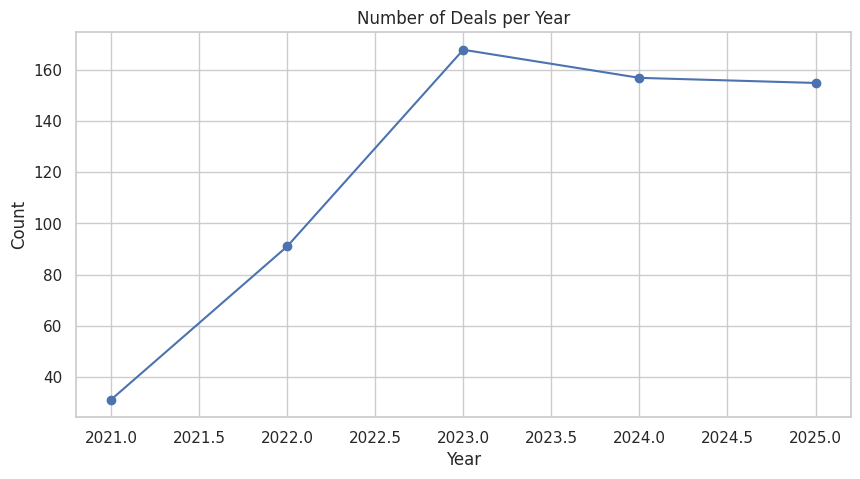

In [52]:
df['Original Air Date'] = pd.to_datetime(df['Original Air Date'], errors='coerce')

df['Year'] = df['Original Air Date'].dt.year
yearly_counts = df['Year'].value_counts().sort_index()

yearly_counts.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Number of Deals per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [53]:
bins = [0, 500, 5000, 20000, np.inf]
labels = ['Low Funding', 'Medium Funding', 'High Funding', 'Very High Funding']
df['FundingLevel'] = pd.cut(df['Original Ask Amount'], bins=bins, labels=labels)
print(df['FundingLevel'].value_counts())

FundingLevel
Low Funding          599
Medium Funding         1
Very High Funding      1
High Funding           0
Name: count, dtype: int64


In [54]:
fig = px.scatter(df, x="Original Ask Amount", y="Deal Valuation", color="Industry",
                 hover_data=["Startup Name", "Season Number"])
fig.update_layout(title="Interactive Scatter Plot: Original Ask vs Deal Valuation")
fig.show()


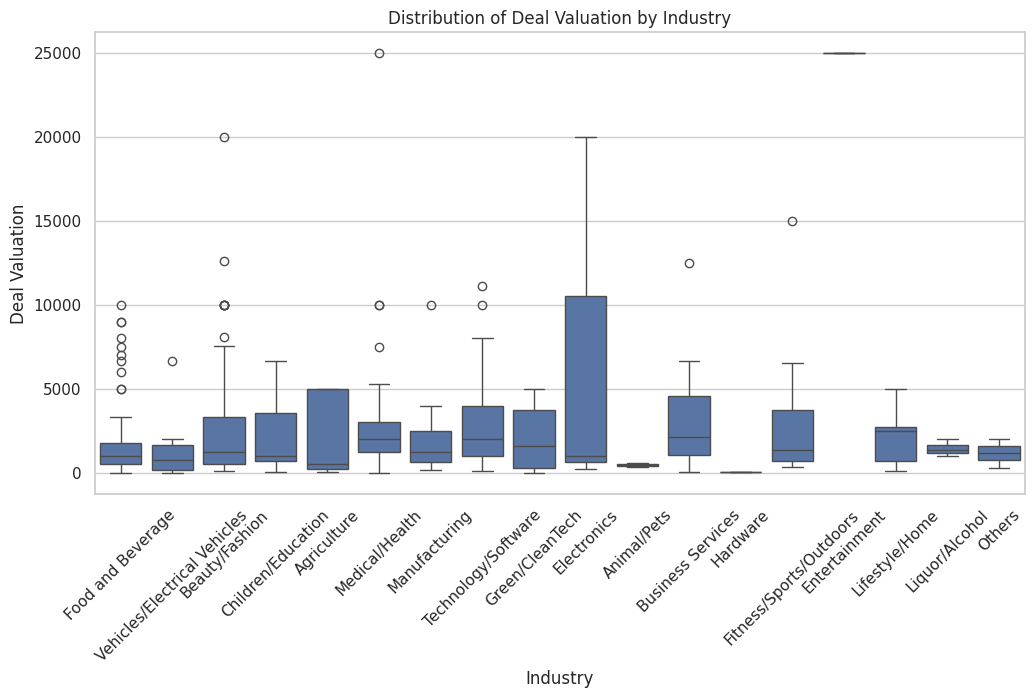

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Industry", y="Deal Valuation")
plt.title("Distribution of Deal Valuation by Industry")
plt.xlabel("Industry")
plt.xticks(rotation=45)
plt.ylabel("Deal Valuation")
plt.show()

In [57]:
df.to_csv("Shark_Tank_India_Cleaned.csv", index=False)
print("Cleaned dataset saved as 'Shark_Tank_India_Cleaned.csv'")

from google.colab import files
files.download("Shark_Tank_India_Cleaned.csv")

Cleaned dataset saved as 'Shark_Tank_India_Cleaned.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>